In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import lightgbm as lgb

df = pd.read_csv("cleaned_reviews.csv")

# Features and target
X_text = df['review']
y = df['sentiment']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(X_text)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf.toarray(), y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)


🔹 Model: Logistic Regression
Accuracy: 0.3888888888888889
AUC-ROC Score (OvR): 0.611111111111111
Mean CV Accuracy: 0.6333333333333333


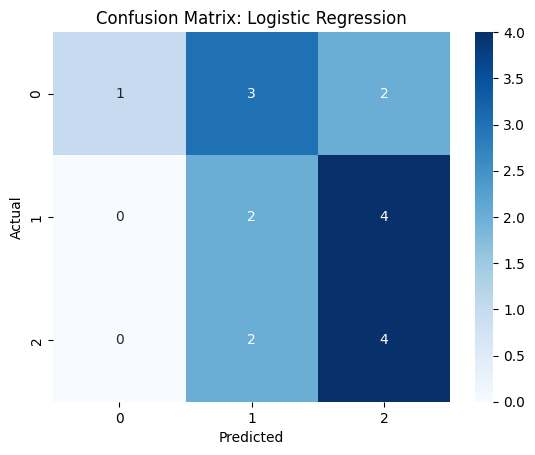


🔹 Model: Random Forest
Accuracy: 0.5
AUC-ROC Score (OvR): 0.6828703703703706
Mean CV Accuracy: 0.4166666666666667


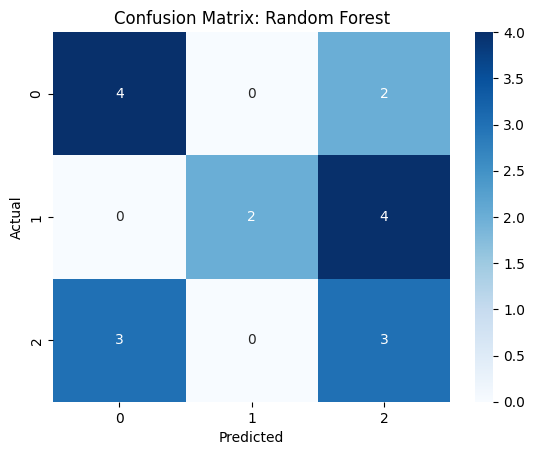


🔹 Model: Naive Bayes
Accuracy: 0.3888888888888889
AUC-ROC Score (OvR): 0.6064814814814815
Mean CV Accuracy: 0.5833333333333333


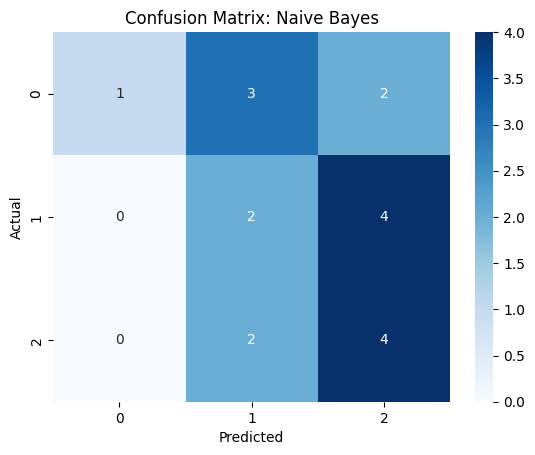


🔹 Model: Linear SVM
Accuracy: 0.3888888888888889
AUC-ROC not available
Mean CV Accuracy: 0.6166666666666667


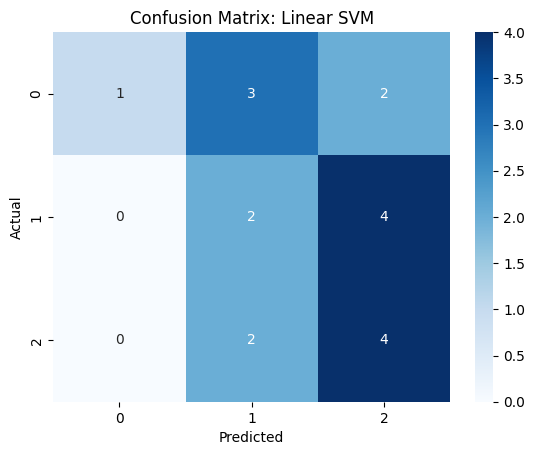


🔹 Model: LightGBM
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 42, number of used features: 0
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more l

c:\Users\This PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\This PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\This PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\This PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\This PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 0
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the

c:\Users\This PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


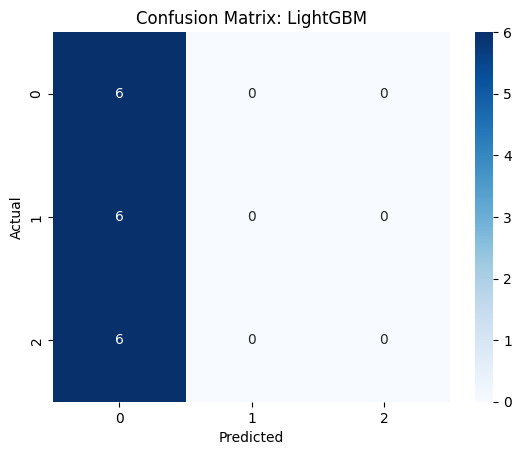


✅ Best Model: Logistic Regression with CV Score = 0.6333333333333333
Model saved as best_model.pkl ✅
✅ TF-IDF vectorizer saved!


In [2]:
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

best_model = None
best_score = 0
best_name = ""

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "LightGBM": lgb.LGBMClassifier(random_state=42)

    
}

for name, model in models.items():
    print(f"\n🔹 Model: {name}")
    
    # Fit
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    
    # AUC-ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        print("AUC-ROC Score (OvR):", auc)
    else:
        auc = 0  # not supported
        print("AUC-ROC not available")
    
    # Cross-validation
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    mean_cv = scores.mean()
    print("Mean CV Accuracy:", mean_cv)


    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Pick best model (based on CV accuracy or AUC)
    if mean_cv > best_score:
        best_score = mean_cv
        best_model = model
        best_name = name

print(f"\n✅ Best Model: {best_name} with CV Score = {best_score}")

# Retrain best model on full dataset before saving
best_model.fit(X_resampled, y_resampled)

# Save to pickle file
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as best_model.pkl ✅")

with open('model/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)  # `tfidf` is your trained TfidfVectorizer
print("✅ TF-IDF vectorizer saved!")



In [4]:
# ==============================
# 🔹 Test with user input
# ==============================
import pickle

# Load best model and vectorizer
with open("best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

with open("model/tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

while True:
    text = input("\nEnter a text to analyze sentiment (or type 'exit' to quit): ")
    if text.lower() == "exit":
        print("👋 Exiting sentiment tester.")
        break

    # Transform text with TF-IDF
    text_tfidf = tfidf.transform([text])

    # Predict
    prediction = best_model.predict(text_tfidf)[0]

    # If probability supported (e.g., Logistic Regression, LightGBM, RF)
    if hasattr(best_model, "predict_proba"):
        proba = best_model.predict_proba(text_tfidf).max()
        print(f"🔮 Predicted Sentiment: {prediction} (confidence: {proba:.2f})")
    else:
        print(f"🔮 Predicted Sentiment: {prediction}")


🔮 Predicted Sentiment: positive (confidence: 0.58)
🔮 Predicted Sentiment: negative (confidence: 0.53)
🔮 Predicted Sentiment: neutral (confidence: 0.54)
👋 Exiting sentiment tester.
